<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-Data" data-toc-modified-id="Introduction-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction Data</a></span></li><li><span><a href="#Understanding-the-data-:" data-toc-modified-id="Understanding-the-data-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding the data :</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-Exploration-:" data-toc-modified-id="Data-Exploration-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration :</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#Check-for-missing-values-:" data-toc-modified-id="Check-for-missing-values-:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Check for missing values :</a></span></li><li><span><a href="#Impute-missing-values" data-toc-modified-id="Impute-missing-values-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Impute missing values</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Transforming-the-data-:" data-toc-modified-id="Transforming-the-data-:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Transforming the data :</a></span><ul class="toc-item"><li><span><a href="#preparing-the-data" data-toc-modified-id="preparing-the-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>preparing the data</a></span></li><li><span><a href="#one-hot-encoder" data-toc-modified-id="one-hot-encoder-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>one hot encoder</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modeling</a></span></li></ul></div>

# Introduction Data

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.



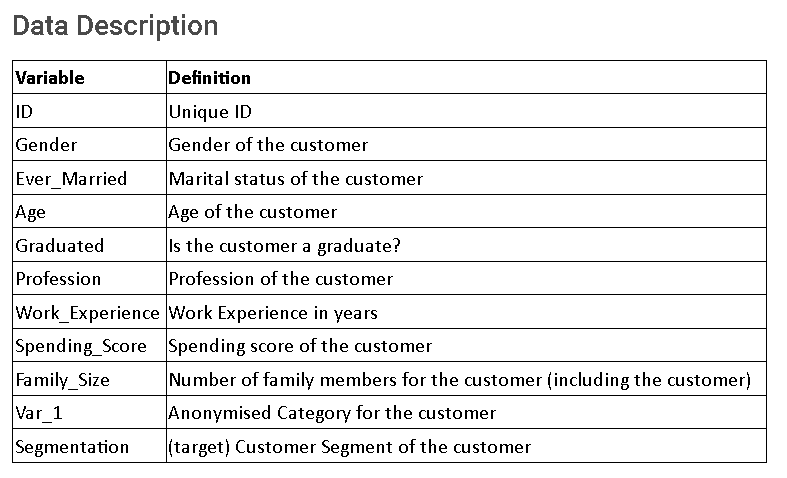

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 10,6
import warnings 
warnings.filterwarnings('ignore')
import plotly as pl 
import os

In [31]:
train = pd.io.parsers.read_csv('{}/train.csv.xls'.format(os.getcwd()))

In [32]:
test = pd.io.parsers.read_csv('{}/test.csv.xls'.format(os.getcwd()))

In [85]:
mouad_submit = pd.io.parsers.read_csv('{}/sample_submission.csv'.format(os.getcwd()))

In [33]:
def understand(data):
    
    name =[x for x in globals() if globals()[x] is data][0]
    print("\n %s" % name)
    display(data.head(3))
    print(data.info())
    
def missing(data):
    
    name =[x for x in globals() if globals()[x] is data][0]
    print("\n %s" % name)
    print(data.isna().sum())
    
    
def describe(data):
    
    display(data.describe(include=[object]))
    display(data.describe(include=[np.number]))
    

# Understanding the data : 

In [35]:
understand(train)
print("")
print('')
print('')
understand(test)


 train


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None




 test


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None


# Data Description 

In [36]:
print('')
print('training data description :')
describe(train)
print('')
print('')
print('Testing data description : ')
describe(test)


training data description :


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000




Testing data description : 


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,2627,2577,2603,2589,2627,2595
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,1424,1520,1602,802,1616,1672


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [38]:
print('')
print('Missing values in training data')
missing(train)
print('')
print('')
print('Missing values in testing data')
missing(test)


Missing values in training data

 train
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


Missing values in testing data

 test
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [44]:
Same_ids = len(set(test['ID'].unique()).intersection(set(train['ID'].unique())))

print(f"Same_ID :{Same_ids}")
print(f"Unique_ID :{test.shape[0] - Same_ids}") ## Not the same ID

### Unique_ID is the primary ID that we have to predict (295 ID)

Same_ID :2332
Unique_ID :295


In [45]:
test_unique = test[~test['ID'].isin(train['ID'])]  ### This's unique testset

display(test_unique.head(3))
print(test_unique.shape)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
19,459045,Female,Yes,88,Yes,Lawyer,1.0,Average,4.0,Cat_6
32,459090,Male,No,31,No,Artist,1.0,Low,2.0,Cat_6


(295, 10)


In [88]:
test_leak = pd.merge(test,train,how='left', on = 'ID') 
test_leak = test_leak[['ID','Segmentation']]

display(test_leak)
### test_leak is show the combination of Same_ID (knowing true segment) and Unique_ID (do not know)

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C
...,...,...
2622,467954,D
2623,467958,A
2624,467960,NaN
2625,467961,B


# Data Exploration :

In [9]:
import plotly.express as px 

In [39]:
z = train.dropna()

In [40]:
fig = px.histogram(z, x='Profession', color='Graduated', barmode='group')

fig.show()

- As we know the top of Profession is Artist this pic1 countplot show that most of them are graduated.

- mostly non graduated be Healthcare prof. surprisingly there have No graduated Doctor.prof why? this's contrast with what I thought. Are they intern ??? what are the age range of them ?. I'll find the asnwer after done with the main goal.

In [41]:
ecdf_train = train.sort_values(by=['Segmentation'])

In [42]:
fig = px.ecdf(data_frame=ecdf_train,x='Age',color='Segmentation')
fig.show()

- 80% of D segment is below 40 yearolds. Follow by A segment around 50%
- 70% more or less of D segment below 35 yearolds and around 30% for A segment.

In [43]:
fig = px.histogram(z, x="Age", color="Ever_Married", facet_col="Gender", facet_row="Profession")
fig.update_layout(
    width=2000,
    height=1100
)

fig.show()

# Missing Values 

## Check for missing values : 

In [46]:
list = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']
list2 = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
list_dict = []
list_dict2 = []
list_dict3 = []

train_code = data.copy()
test_code = data2.copy()

def cat_code2(dataset,list,list_dict):
    for col in list:
        dataset[col] = dataset[col].astype('category')
        globals()[f"my_{col}"] = dict(enumerate(dataset[col].cat.categories))
        dataset[col] = dataset[col].cat.codes
        list_dict.append(globals()[f"my_{col}"])

cat_code2(train_code,list,list_dict)
cat_code2(test_code,list2,list_dict2)
cat_code2(test_unique,list2,list_dict3)

In [47]:
train_code = train_code.replace({-1:np.nan})  ### -1 is missing value
test_code = test_code.replace({-1:np.nan})
test_unique = test_unique.replace({-1:np.nan})

In [49]:
print(train_code.isna().sum()) # Before 

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


## Impute missing values

In [50]:
from sklearn.impute import KNNImputer

col_imp = train_code.columns.drop('Segmentation')  ## target col

def imp_knn(df,col):
    imputer = KNNImputer(n_neighbors=5)   
    imputer.fit(df[col_imp])
    df[col_imp] = imputer.transform(df[col_imp])
    
imp_knn(train_code,col_imp)

In [52]:
print(train_code.isna().sum()) # After

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [53]:
test_code = test_code.fillna(train_code) 
### can use impute process or combine trainset and testset before then impute missing next split it

train_code = train_code.astype('int')
test_code = test_code.astype('int')

display(train_code.sample(3))

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
6635,462299,0,0,33,0,5,7,2,6,5,2
651,463951,1,1,46,0,3,0,0,3,5,0
6130,459642,1,1,36,1,4,5,1,4,5,1


# Correlation 

<AxesSubplot:>

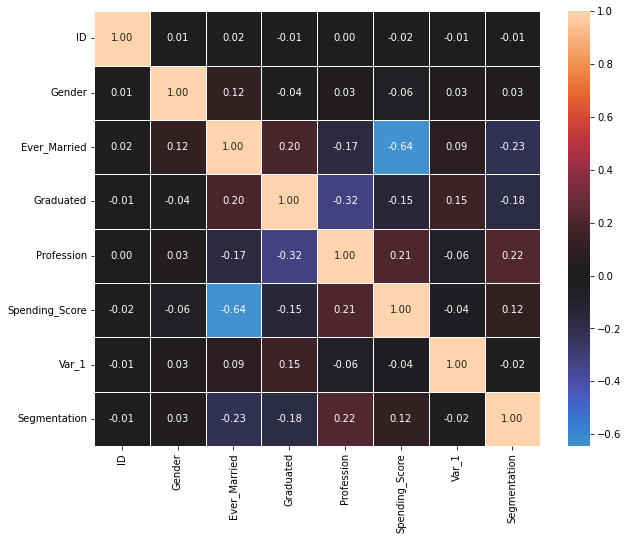

In [54]:
spearman_corrData = train_code.drop(['Age','Work_Experience','Family_Size'],axis=1)
person_Data = train_code[['Age','Work_Experience','Family_Size']]

corr = spearman_corrData.corr(method = 'spearman')

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr ,fmt='.2f', annot = True,linewidths=.5, ax=ax , center=0)

<AxesSubplot:>

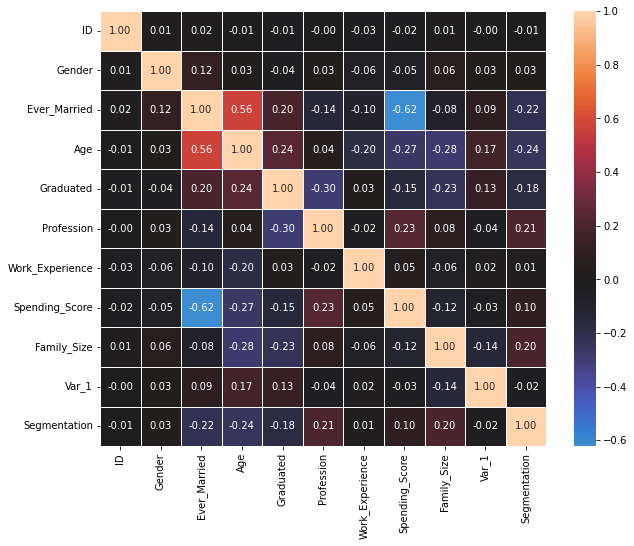

In [55]:
corr2 = train_code.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr2 ,fmt='.2f', annot = True,linewidths=.5, ax=ax , center=0)

# Transforming the data :

## preparing the data 

In [56]:
## prepare the right type

def cat_trans(df):
    cat_col = df.columns.drop(['Age','Work_Experience','Family_Size'])
    for cat in cat_col:
        df[cat] = df[cat].astype('category')

cat_trans(train_code)
cat_trans(test_code)

In [57]:
train_code = train_code.drop('ID',axis=1) 
test_code = test_code.drop('ID',axis=1)

## one hot encoder

In [60]:
train_code

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,2,0,3,3,0
2,0,1,67,1,2,1,2,1,5,1
3,1,1,67,1,7,0,1,2,5,1
4,0,1,40,1,3,2,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,5,0,2,7,0,3
8064,1,0,35,0,4,3,2,4,3,3
8065,0,0,33,1,5,1,2,1,5,3
8066,0,0,27,1,5,1,2,4,5,1


# Modeling 

In [61]:
feature = train_code.columns.drop('Segmentation')

X = train_code[feature].values
y = train_code[['Segmentation']].values

In [62]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model = RandomForestClassifier()

In [65]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
model.score(X_train,y_train)

0.9631236442516269

In [67]:
model.score(X_test,y_test)

0.4882280049566295

In [68]:
from sklearn.neural_network import MLPClassifier

In [77]:
mlp =MLPClassifier(random_state=1 
                   ,activation ='logistic'
                   ,max_iter = 400)

In [78]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', max_iter=400, random_state=1)

In [79]:
mlp_pred = mlp.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, mlp_pred))

0.5266418835192069


In [81]:
rf = RandomForestClassifier(n_estimators=200,random_state=42, n_jobs =-1 , criterion = 'entropy')

In [82]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [83]:
rf_pred=rf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

0.5


In [89]:
predict_mlp_submit = mlp.predict(test_code)
mouad_submit['predict_Seg']= predict_mlp_submit
mouad_submit = mouad_submit.replace({'predict_Seg': my_Segmentation}).drop('Segmentation',axis=1)
mouad_submit = mouad_submit.rename(columns={'predict_Seg':'Segmentation'})

test_leak3 = test_leak.merge(mouad_submit, on='ID' , how='left')
display(test_leak3.tail(6))

,ID,Segmentation_x,Segmentation_y
2621,467950,D,A
2622,467954,D,D
2623,467958,A,A
2624,467960,NaN,A
2625,467961,B,B
2626,467968,NaN,D


In [90]:
test_leak3['Segmentation'] = test_leak3['Segmentation_x'].fillna(test_leak3['Segmentation_y'])
test_leak3 = test_leak3.drop(['Segmentation_x','Segmentation_y'],axis=1)
display(test_leak3.tail(6))

,ID,Segmentation
2621,467950,D
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,B
2626,467968,D


In [91]:
test_leak3.to_csv('mlp_seg.csv',index=False)